In [4]:
#importing the required modules such as numpy,pandas,sklearn and matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
"""loading the required dataset directly from sklearn therefore we don't need do any datapreprocessing, if the kaggle dataset was needed to be used 
just need to drop the id column, and since they are no missing values also we don't need to fill them using fillna or remove that row
we also don't need to do any feature scaling as all the features are already on a similar scale
"""
from sklearn.datasets import load_iris
iris=load_iris()
#creating a pandas dataframe  
iris_data = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_data['Flower_Species']= iris.target
#printing the first few values in the dataframe
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#we need to convert the target vatiable to a one-hot encoder array
#we convert it into a numpy array so that we can get the X (features) and y (target) whch needs to be converted into one-hot encoder array
iris_np = iris_data.to_numpy()
X = iris_np[:,0:4] #selecting all the rows using : and the columns of 0,1,2,3 using 0:4
y = iris_np[:,4] #selecting all the rows using : and the target column i.e index 4
#print(X)
#print(y)
y = tf.keras.utils.to_categorical(y,3)
#print(y)

In [7]:
no_classes = 3 #len(np.unique(y)) this can also be used
#creating a sequential model in Keras
model = tf.keras.models.Sequential()
#creating the first layer with number of nodes = 128, number of input variables = 4 and using reLu activation function
model.add(keras.layers.Dense(128, input_shape=(4,),name="hidden_layer1",activation='relu'))
#creating the second layer with number of nodes = 128 and using reLu activation function
model.add(keras.layers.Dense(128, name="hidden_layer2",activation='relu'))
#creating the output layer with number of nodes = no_classes and using softmax function
#we use softmax function because we predict the probabilities of each class for the given input
model.add(keras.layers.Dense(no_classes, name='ouput_layer', activation='softmax'))

In [8]:
#we use the categorical crossentropy loss function as it is a multiclass classification model
#categorical crossentropy is used as it measures the predicted probability distribution and the true probability distribution
#we use the accuracy metric to measure the loss
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
#printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 128)               640       
                                                                 
 hidden_layer2 (Dense)       (None, 128)               16512     
                                                                 
 ouput_layer (Dense)         (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [16]:
#fitting the model with batch size of 8 (take 8 training inputs and perform forward and backward propagation), number of epochs 10, 80% training
#verbose=1 so that we can see the progress updates during training
history=model.fit(X,y,batch_size=8,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1525 - accuracy: 0.9417 - val_loss: 0.5755 - val_accuracy: 0.6333
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9750 - val_loss: 0.7222 - val_accuracy: 0.5667
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1103 - accuracy: 0.9500 - val_loss: 0.5103 - val_accuracy: 0.7000
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1079 - accuracy: 0.9667 - val_loss: 0.6032 - val_accuracy: 0.6333
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9750 - val_loss: 1.7809 - val_accuracy: 0.1000
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9583 - val_loss: 0.9201 - val_accuracy: 0.5000
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0766 - accuracy: 0.9750 - val_loss: 0.1197 - val_accuracy: 1.0000
Epoch 8/10
15/15 [==

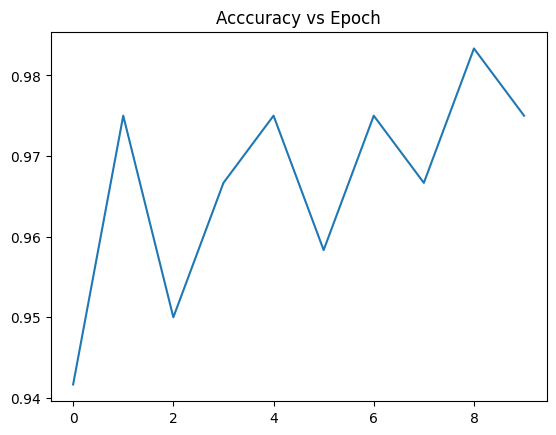

In [17]:
#plotting the accuracy after each epoch
pd.DataFrame(history.history)["accuracy"].plot()
plt.title("Acccuracy vs Epoch")
plt.show()

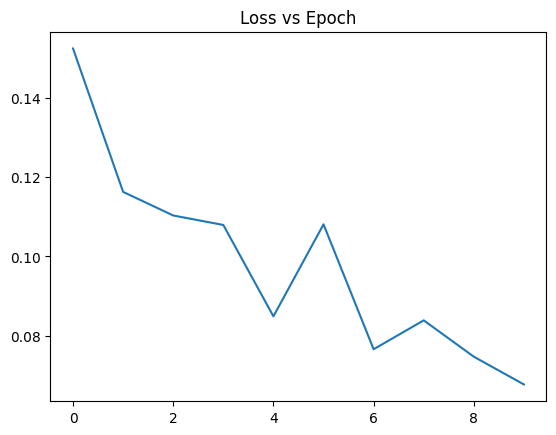

In [19]:
#plotting the loss after each epoch
pd.DataFrame(history.history)["loss"].plot()
plt.title("Loss vs Epoch")
plt.show()